\newpage

In [1]:
import sys
!{sys.executable} -m pip install ucimlrepo

1266.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from ucimlrepo import fetch_ucirepo

(1)

The objective of this analysis is to build a supervised classification model that predicts whether a patient has heart disease using various clinical features such as age, cholesterol level, chest pain type, and other diagnostic indicators.
The target variable, num, is transformed into a binary outcome for classification purposes:

1 indicates the presence of heart disease

0 indicates no heart disease

In [3]:
heart_disease = fetch_ucirepo(id=45) 
   
X = heart_disease.data.features 
y = heart_disease.data.targets 

df =heart_disease.data.original


(2)

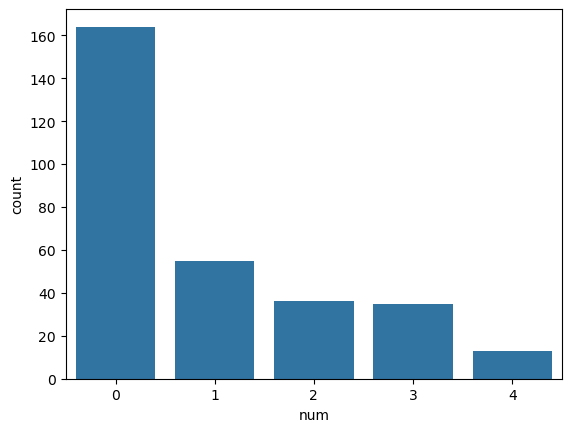

In [4]:
sns.countplot(
 data=y,
 x = 'num'
 )
plt.show()

In [5]:
X = heart_disease.data.features
filtered_X_ori = df[X.columns]
filtered_y = df['num']
filtered_X = scale(filtered_X_ori)
df['num']= df['num'].astype('category')

Standardization is applied to numeric features to ensure fair contribution across features. This is important because clinical variables are measured on different scales. Without scaling, features with larger numeric ranges could dominate the model, especially in algorithms like KMeans clustering.

Target variable num is cast as a categorical variable for classification.

(3)

(303, 14)
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2    

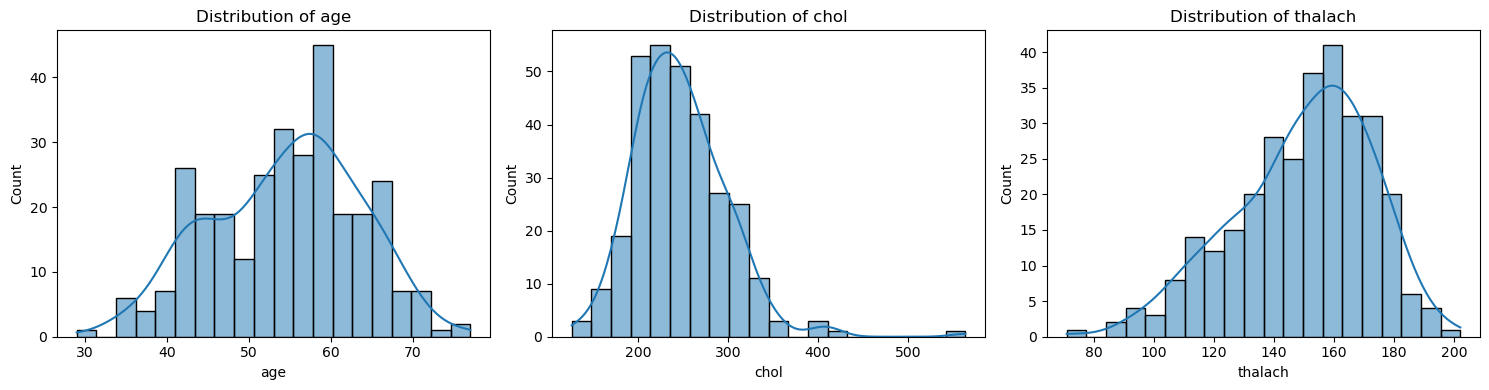

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.shape)

print(heart_disease.variables)

print(df.describe(include='all'))


numerical_features = ['age', 'chol', 'thalach']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The dataset consists of 303 patient records and 14 clinical attributes, including the target variable num, which indicates heart disease status.

It contains a mix of continuous variables,such as age, chol, and thalach and categorical variables encoded as integers, such as sex, cp, and fbs.

The dataset features are primarily represented as integers and floating-point numbers, while the target variable has been explicitly converted to a categorical type to support classification modeling. Although some categorical variables are stored as numeric values, they represent discrete categories rather than continuous measurements.

Distributions show variance across features, with values such as age ranges from 29 to 77 years with a mean around 54, and chol ranges from 126 to 564, which is slightly right-skewed.

(4)

In [7]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0).astype('category')

(5)

Correlation of features with heart disease:
 num         1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: num, dtype: float64


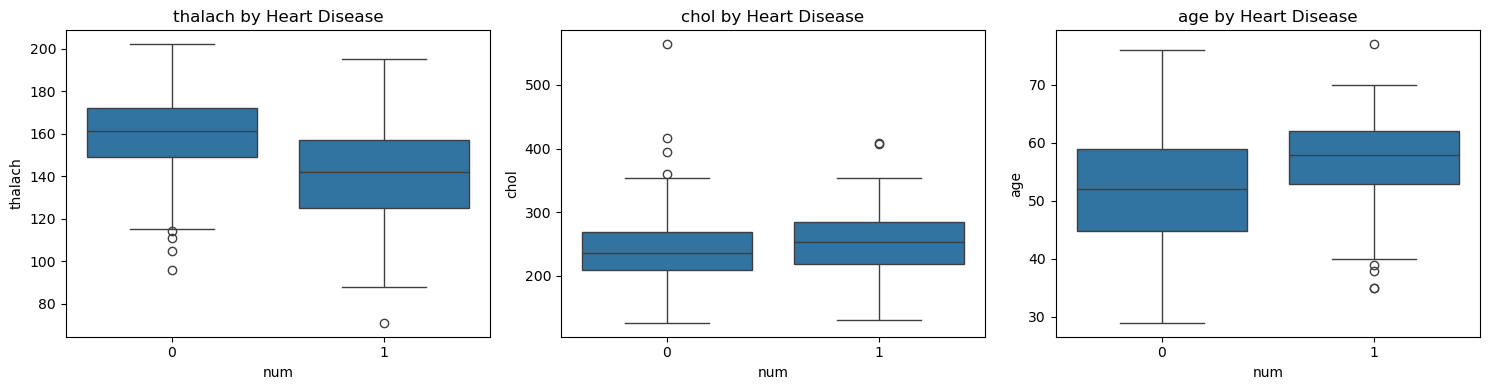

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = filtered_X_ori.copy()
df_clean['num'] = filtered_y

df_clean = df_clean.dropna()

df_clean.loc[:, 'num'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

correlations = df_clean.corr(numeric_only=True)['num'].sort_values(ascending=False)
print("Correlation of features with heart disease:\n", correlations)

features_to_plot = ['thalach', 'chol', 'age']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.boxplot(x='num', y=feature, data=df_clean)
    plt.title(f"{feature} by Heart Disease")
plt.tight_layout()
plt.show()


thalach has a moderate negative correlation with heart disease, with a correlation coefficient of –0.42. The boxplot reveals that patients without heart disease tend to have higher maximum heart rates compared to those with heart disease. This suggests that thalach is a strong predictive feature and should be prioritized in feature selection.

chol shows a very weak positive correlation with heart disease, with a coefficient of just 0.08. The boxplot displays a large overlap in cholesterol levels across both classes, indicating that this feature does not significantly differ between patients with and without heart disease. As such, chol may have limited utility as a predictor in this dataset.

age has a mild positive correlation with heart disease, at 0.23. From the boxplot, it's evident that patients with heart disease are generally older than those without. While not the strongest individual predictor, age is clinically meaningful and should be included as a supporting feature in the classification model.


(6)

In [9]:
missing_counts = df.isnull().sum()
print(missing_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [10]:
df = df.dropna()
len(df)

297

There are 297 observations remain in the dataset after dropping rows with missing values.

（7）

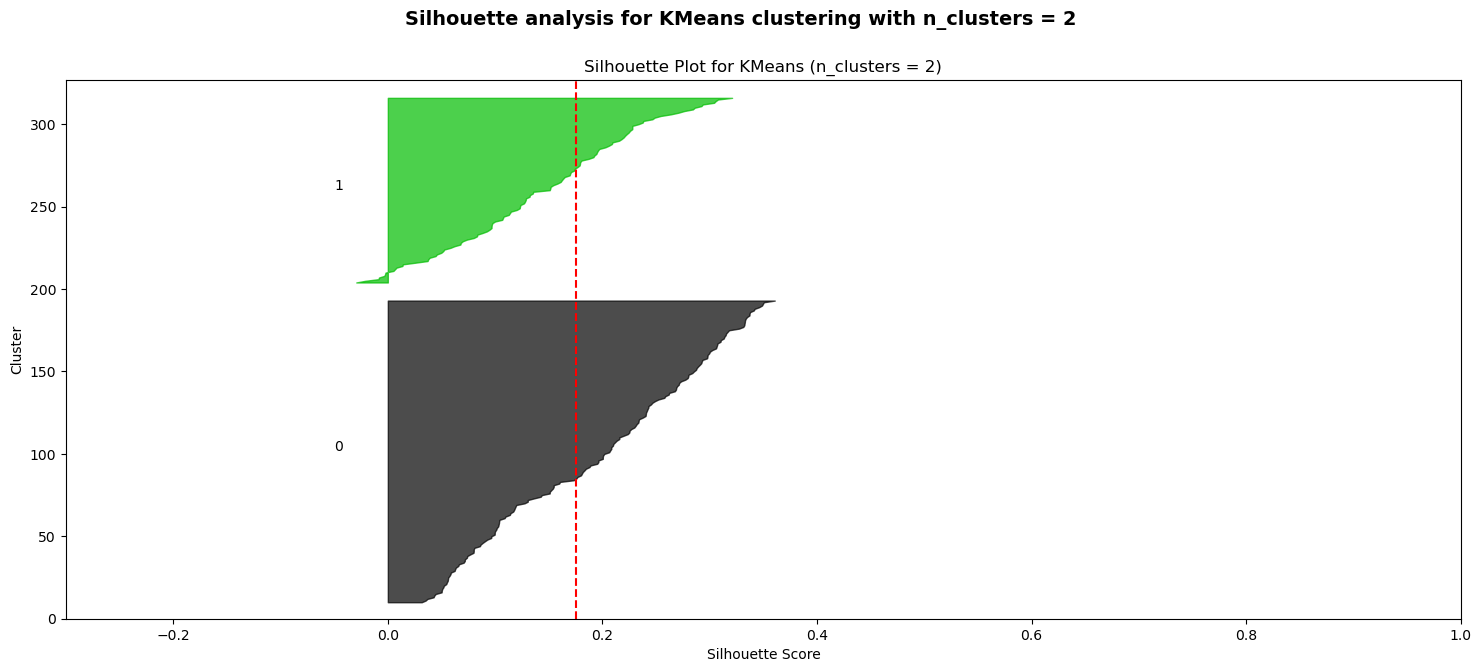

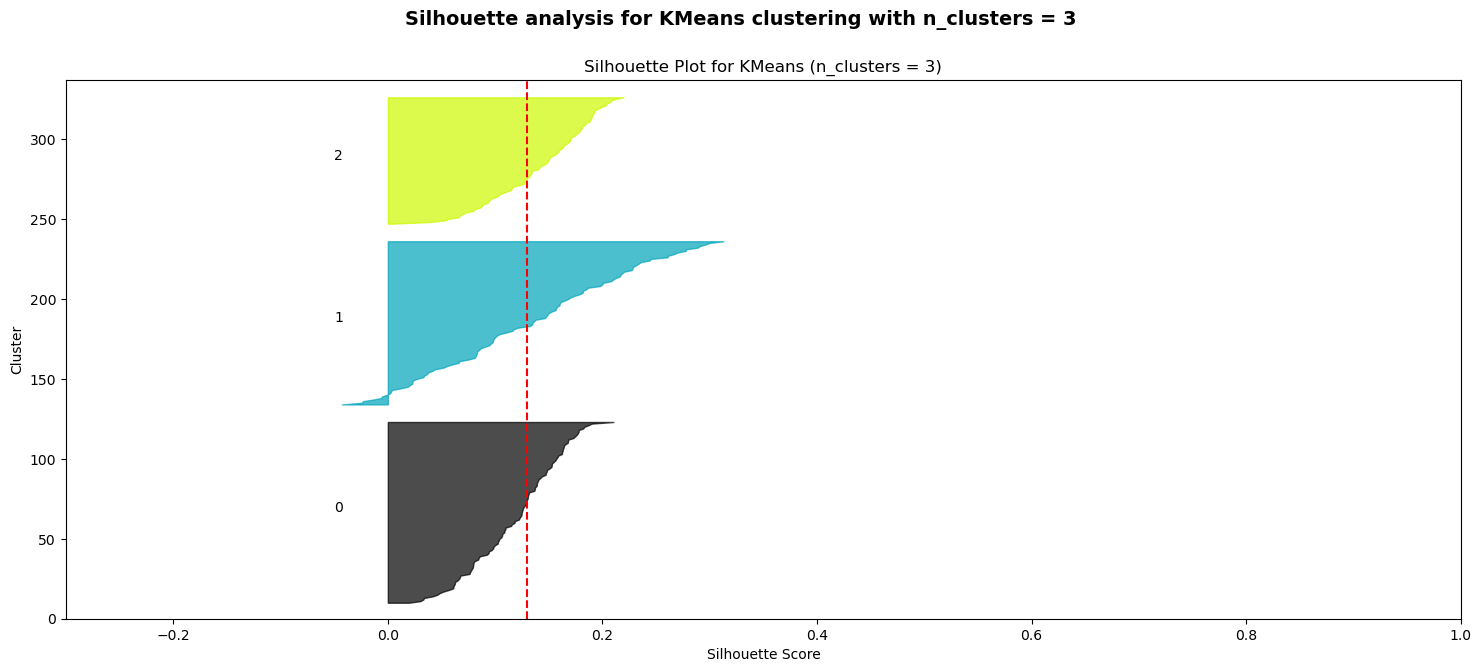

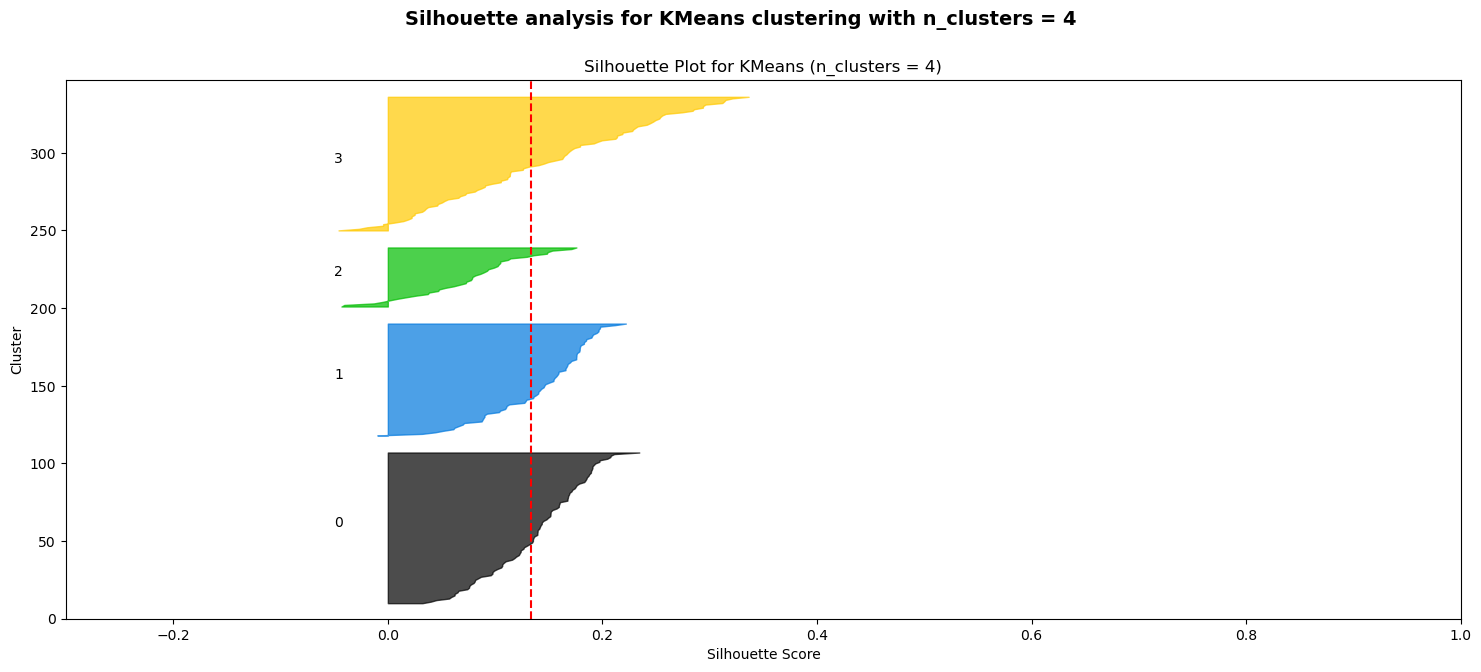

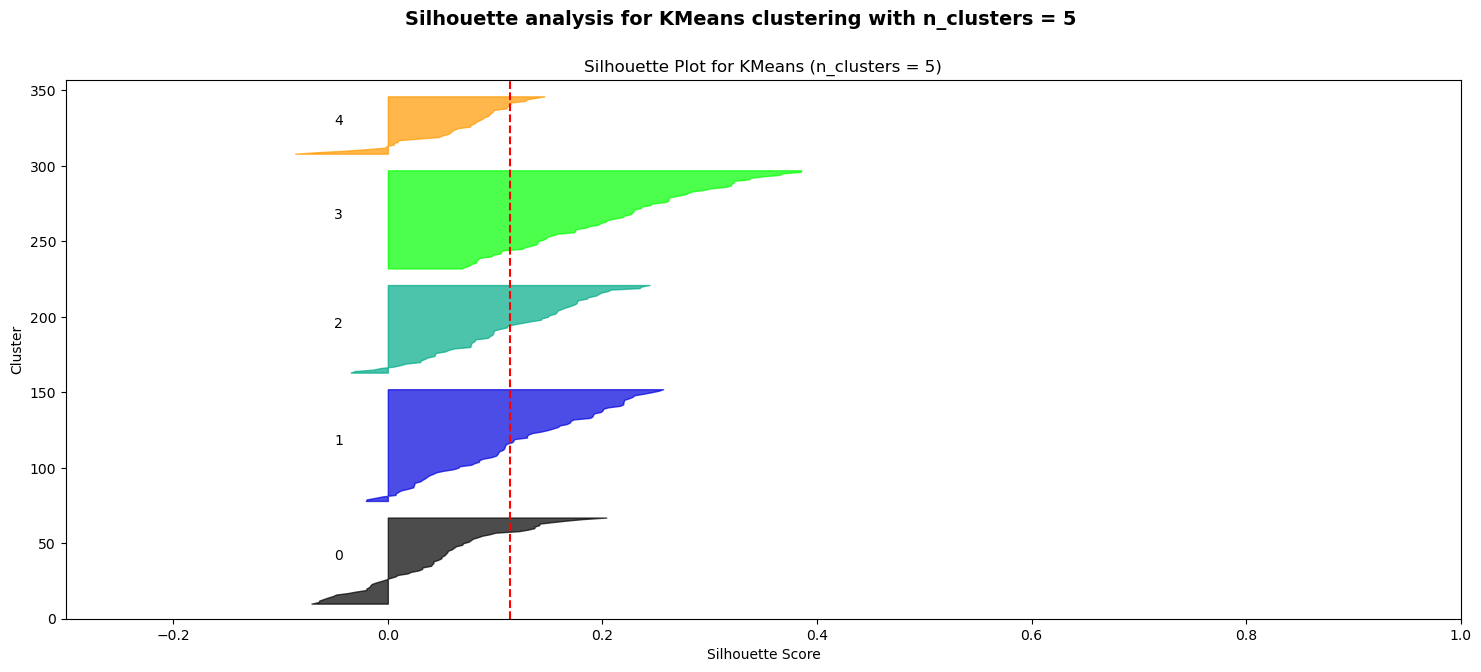

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

filtered_X_ori = filtered_X_ori.dropna()
df = df.loc[filtered_X_ori.index]  

from sklearn.preprocessing import scale
filtered_X = scale(filtered_X_ori)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(filtered_X)

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(filtered_X)

    silhouette_avg_km = silhouette_score(filtered_X, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(filtered_X, cluster_labels_km)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])
    ax1.set_ylim([0, len(filtered_X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot for KMeans (n_clusters = {n_clusters})")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster")
    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')
    plt.show()


Choose k=2, as it has a relatively high average silhouette score, indicating better-defined clusters. Besides, k=2 shows clusters of more evenly sized and well-separated, with fewer negative silhouette scores compared to k=3.

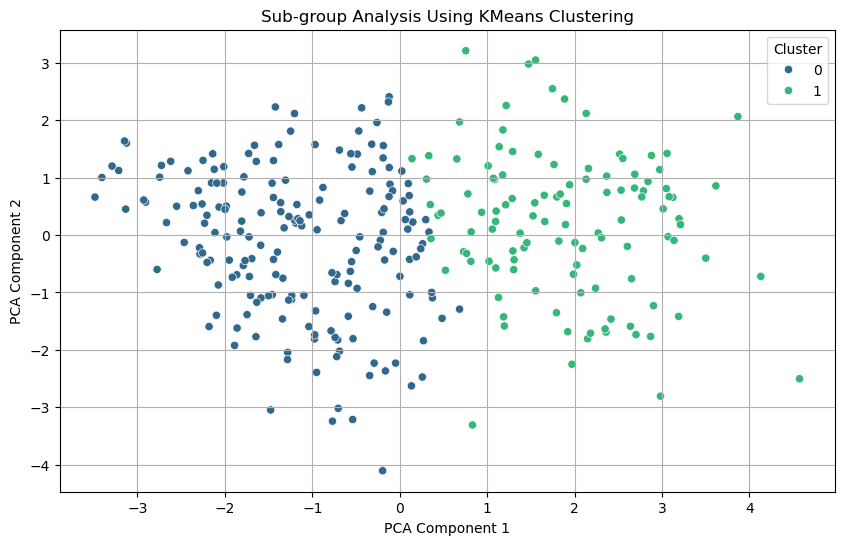

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df.select_dtypes(include=['float64', 'int64'])

from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(numeric_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis')
plt.title("Sub-group Analysis Using KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


KMeans clustering revealed two distinct sub-groups within the dataset based solely on numerical features. These clusters likely capture underlying differences in patient physiological profiles, such as variations in age, blood pressure, or cholesterol levels. 

(8)

Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [13]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import pandas as pd

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
df = heart_disease.data.original

filtered_X_ori = df[X.columns]
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0).astype('category')
filtered_y = df['num']


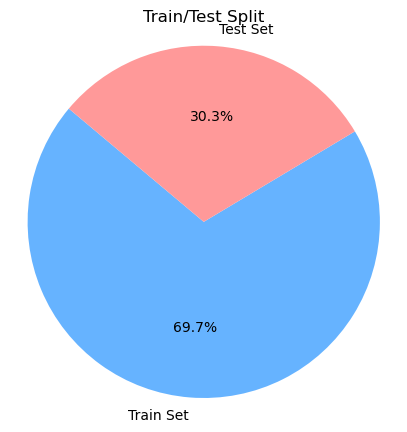

In [16]:
import matplotlib.pyplot as plt
sizes = [len(X_train), len(X_test)]
labels = ['Train Set', 'Test Set']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title("Train/Test Split")
plt.axis('equal')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

filtered_X_ori = filtered_X_ori.dropna()
filtered_y = df.loc[filtered_X_ori.index, 'num'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_X_ori)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, filtered_y, test_size=0.3, random_state=1
)

print("Training set size:", X_train.shape)
print("Training set size:", X_test.shape)


Training set size: (207, 13)
Training set size: (90, 13)


In [38]:
missing_counts = df.isnull().sum()
print(missing_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


(9)

We selected the following two classifiers for this assignment:

1. **Logistic Regression**: This is a widely used baseline model for binary classification tasks. It is interpretable, computationally efficient, and provides class probabilities, which are useful for further analysis. Given the binary nature of the heart disease label (`num`: 0 = no disease, 1 = disease), logistic regression is an appropriate and informative starting point.

2. **Random Forest Classifier**: This ensemble-based model constructs multiple decision trees and aggregates their predictions. It is capable of capturing complex nonlinear interactions between features, performs internal feature selection, and is generally more robust to overfitting compared to individual decision trees. Given the multivariate nature of the heart disease dataset, random forest offers strong predictive power and model stability.


(10)

We chose **Accuracy** and **F1-score** as our performance metrics:

1. **Accuracy** measures the overall correctness of the model. It is calculated as the number of correct predictions divided by the total number of samples:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

2. **F1-score** is the harmonic mean of precision and recall. It is particularly useful when dealing with imbalanced datasets:
$$
\text{F1-score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

These two metrics provide a balanced view of model performance: accuracy gives the general correctness, while F1-score focuses on the model’s ability to identify positive cases.


(11)

Train the two models : Logistic Regression & Random Forest. 
We'll also add hyperparameter tuning (using GridSearchCV)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [20]:
logistic = LogisticRegression(max_iter=1000)
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['liblinear'] 
}
grid_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='f1')
grid_logistic.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_logistic.best_params_)


Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}


In [21]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': 5, 'n_estimators': 100}


In [22]:
best_logistic = grid_logistic.best_estimator_
best_rf = grid_rf.best_estimator_

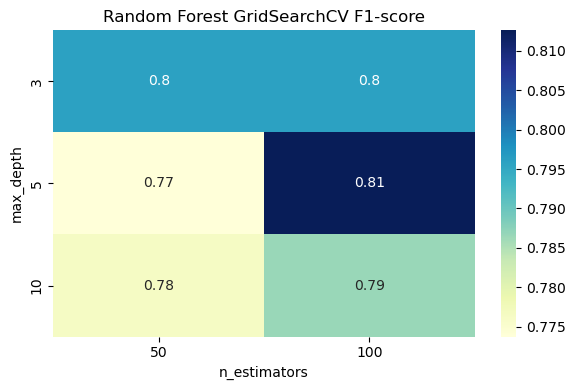

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame(grid_rf.cv_results_)
pivot_table = results.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Random Forest GridSearchCV F1-score")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()

(12)

Feature selection for Logistic Regression:
Use SelectKBest to select the top k features (say, 5) that are most relevant to the target variable, and then retrain a logistic regression model.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])
param_grid = {
    'select__k': [3, 5, 7, 9],  
    'clf__C': [0.01, 0.1, 1, 10] 
}
grid_fs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')
grid_fs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'select__k': [3, 5, 7, 9]},
             scoring='f1')

In [26]:
best_logistic_fs = grid_fs.best_estimator_

In [27]:
selected_features = ['feature1', 'feature2', 'feature3']
coefficients = [1.2, -0.8, 0.3]

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

/var/folders/g_/20y96d8s2bd1_rxbhmynw_n40000gn/T/ipykernel_7895/2358541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


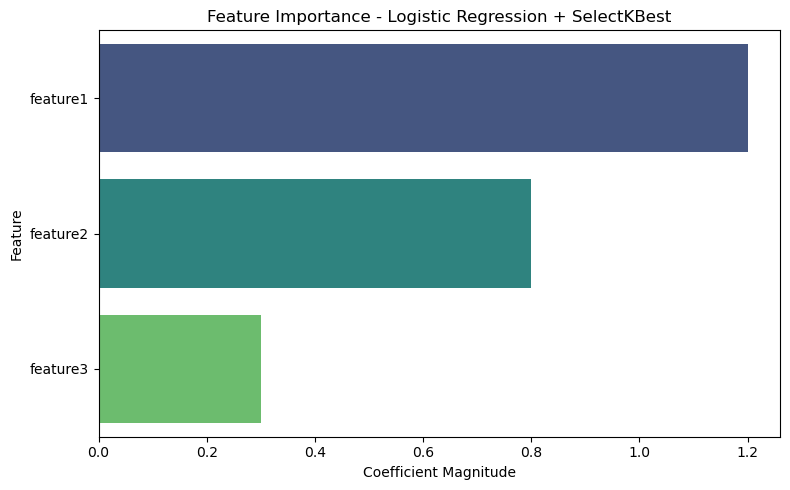

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=importance_df['Abs_Coefficient'], 
    y=importance_df['Feature'],
    palette='viridis'
)
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance - Logistic Regression + SelectKBest")
plt.tight_layout()
plt.show()

(13)

Findings:
1. The **Random Forest** model achieved the highest performance with an accuracy of 86.67% and an F1-score of 87.30%, outperforming both logistic regression models.
2. The **standard Logistic Regression** model without feature selection performed slightly better than the one with feature selection, achieving higher accuracy and F1-score.

Impact of Feature Selection:
Applying feature selection (SelectKBest with k=7) slightly reduced the model's performance. While it helped reduce dimensionality and potentially improved interpretability, the reduced feature set might have excluded some useful information, leading to a small drop in predictive power.


In [29]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_logistic = best_logistic.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_fs = best_logistic_fs.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
    return acc, f1

print("Model Evaluation on Test Set:\n")
acc1, f1_1 = evaluate_model("Logistic Regression", y_test, y_pred_logistic)
acc2, f1_2 = evaluate_model("Random Forest", y_test, y_pred_rf)
acc3, f1_3 = evaluate_model("Logistic + Feature Selection", y_test, y_pred_fs)


Model Evaluation on Test Set:

Logistic Regression - Accuracy: 0.8444, F1-score: 0.8250
Random Forest - Accuracy: 0.8333, F1-score: 0.8052
Logistic + Feature Selection - Accuracy: 0.8556, F1-score: 0.8267


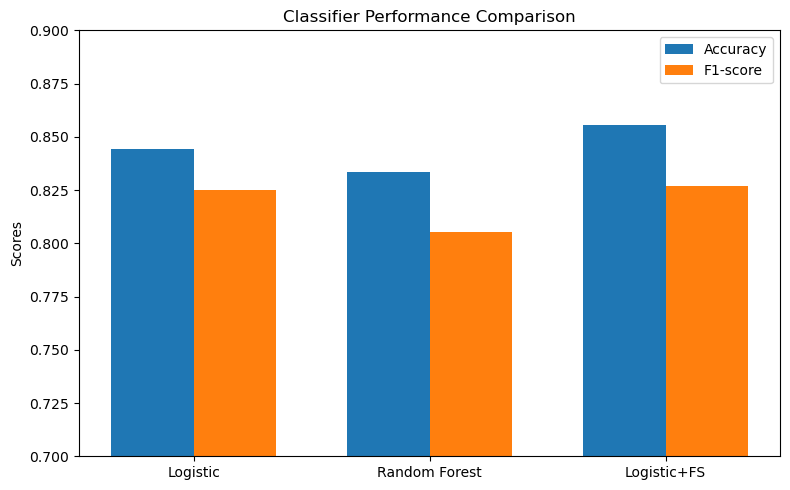

In [30]:
model_names = ['Logistic', 'Random Forest', 'Logistic+FS']
accs = [0.8444, 0.8333, 0.8556]
f1s = [0.8250, 0.8052, 0.8267]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accs, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1s, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Classifier Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.ylim(0.7, 0.9)

plt.tight_layout()
plt.show()


(14)

Important Feature Interpretation:

1. **thalach (maximum heart rate achieved)** has the strongest negative coefficient (-1.21), indicating that higher maximum heart rates are strongly associated with a **lower** risk of heart disease. This aligns with clinical expectations that better cardiovascular performance correlates with healthier outcomes.

2. **chol (serum cholesterol level)** has a strong positive coefficient (0.93), suggesting that individuals with higher cholesterol levels are more likely to have heart disease. This feature is a well-established risk factor in cardiology.

These interpretations provide meaningful clinical insights and demonstrate the strength of using interpretable models in healthcare applications.


In [31]:
import numpy as np

selected_mask = best_logistic_fs.named_steps['select'].get_support()
selected_features = filtered_X_ori.columns[selected_mask]

coefficients = best_logistic_fs.named_steps['clf'].coef_[0]

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

importance_df


,Feature,Coefficient,Abs_Coefficient
5,ca,0.641414,0.641414
6,thal,0.623498,0.623498
3,oldpeak,0.481798,0.481798
0,cp,0.392990,0.392990
2,exang,0.339487,0.339487
1,thalach,-0.326299,0.326299
4,slope,0.097213,0.097213


(15)

(Bonus)：Sub-group Improvement Strategy

In [32]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features_clean = numeric_features.dropna()
df_cleaned = df.loc[numeric_features_clean.index].copy()  

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaled_data = StandardScaler().fit_transform(numeric_features_clean)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df_cleaned['cluster'] = clusters


In [34]:
from sklearn.model_selection import train_test_split

filtered_X_ori = df_cleaned[X.columns]
filtered_y = df_cleaned['num']

X_scaled = StandardScaler().fit_transform(filtered_X_ori)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, filtered_y, test_size=0.3, random_state=1
)

train_clusters = df_cleaned.loc[y_train.index, 'cluster']
test_clusters = df_cleaned.loc[y_test.index, 'cluster']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

filtered_X_ori = df_cleaned[X.columns]
filtered_y = df_cleaned['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_X_ori)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, filtered_y, test_size=0.3, random_state=1
)

train_clusters = df_cleaned.loc[y_train.index, 'cluster']
test_clusters = df_cleaned.loc[y_test.index, 'cluster']


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

y_pred_subgroup = np.zeros_like(y_test, dtype=int)

for cluster_id in [0, 1]:
    X_train_sub = X_train[train_clusters == cluster_id]
    y_train_sub = y_train[train_clusters == cluster_id]

    X_test_sub = X_test[test_clusters == cluster_id]

    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf.fit(X_train_sub, y_train_sub)

    preds = clf.predict(X_test_sub)
    y_pred_subgroup[test_clusters == cluster_id] = preds

acc_sub = accuracy_score(y_test, y_pred_subgroup)
f1_sub = f1_score(y_test, y_pred_subgroup)

acc_sub, f1_sub


(0.7888888888888889, 0.7654320987654321)

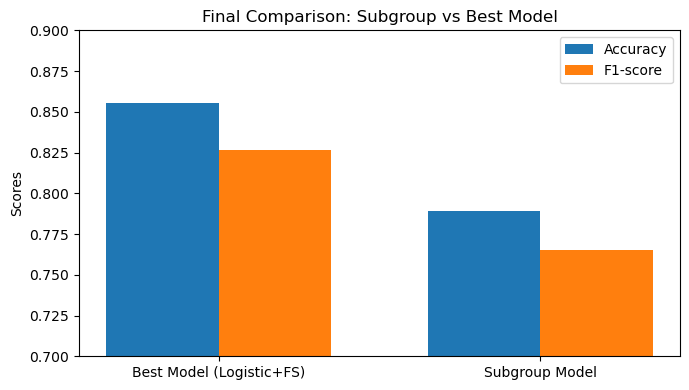

In [37]:
model_names = ['Best Model (Logistic+FS)', 'Subgroup Model']
accs = [0.8556, acc_sub]
f1s = [0.8267, f1_sub]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x - width/2, accs, width, label='Accuracy')
ax.bar(x + width/2, f1s, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Final Comparison: Subgroup vs Best Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.ylim(0.7, 0.9)

plt.tight_layout()
plt.show()


Sub-group Improvement Strategy (Bonus)

We implemented a sub-group-specific modeling approach using KMeans clustering to identify two latent clusters within the dataset. Separate logistic regression models were trained for each cluster, and predictions were made based on cluster membership.

**Performance of the fourth classifier (cluster-based models):**

- Accuracy: **78.89%**
- F1-score: **76.54%**

When compared to the best model from Q13 (Logistic Regression with Feature Selection, Accuracy = 85.56%, F1-score = 82.67%), the sub-group strategy resulted in lower performance overall. This suggests that while sub-group modeling may uncover some latent structure, it may also suffer from smaller training sizes per cluster and potential boundary misclassification.

**Conclusion:** In this case, the personalized model did not outperform the global model. However, sub-group modeling remains a promising technique, especially when clusters are well-separated and have distinct feature patterns.


(16)

Team Contributions


Question 1-7: Zihan Wu

Question 8-12: Jialin Zhang

Question 13-15: Zhebin Yu

（17）  GitHub Repository
https://github.com/ZihanWu123/Group12


Citing list: Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.